In [2]:
import xarray as xr

import cfgrib
import eccodes


In [4]:
# Code in this Section is for Retrieving Turbulence Grib2 Data from NOAA/AWC. Make Sure not to Run too many Times or will get temporarily banned.



import requests

url = "https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20240109/00/atmos/gfs.t00z.awf_0p25.f027.grib2" # time (File prefix) to be edited to change downloaded File. This is For testing only.
response = requests.get(url, stream=True)

if response.status_code == 200:
    with open('downloaded_grib2_file.grib2', 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192): 
            file.write(chunk) # Saving file to current dir


In [3]:
import matplotlib.pyplot as plt

In [ ]:
# level from 175 to 400 milibars (7200m to 12500m)

# cat for Clear Air Turbulence
# mwt For Mountain Wave Turbulence.

# We can calculate Total Turbulence Level by adding CAT with MWT.

In [36]:
ds = xr.open_dataset(r"C:\Users\User\Desktop\FlightSafetyForecast\downloaded_grib2_file.grib2", engine="cfgrib",backend_kwargs={'filter_by_keys': {'typeOfLevel': 'isobaricInhPa', 'level': 300}})

In [40]:
ds

<xarray.Dataset>
Dimensions:        (latitude: 721, longitude: 1440)
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
    isobaricInhPa  float64 ...
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] ...
Data variables:
    unknown        (latitude, longitude) float32 ...
    cat            (latitude, longitude) float32 0.065 0.065 ... 0.034 0.034
    mwt            (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2024-01-21T23:13 GRIB to CDM+CF via cfgrib-0.9.1...

In [41]:
ds['cat']

<xarray.DataArray 'cat' (latitude: 721, longitude: 1440)>
array([[0.065, 0.065, 0.065, ..., 0.065, 0.065, 0.065],
       [0.067, 0.066, 0.066, ..., 0.068, 0.067, 0.067],
       [0.063, 0.064, 0.062, ..., 0.064, 0.062, 0.061],
       ...,
       [0.037, 0.037, 0.037, ..., 0.037, 0.036, 0.036],
       [0.037, 0.037, 0.037, ..., 0.037, 0.037, 0.037],
       [0.034, 0.034, 0.034, ..., 0.034, 0.034, 0.034]], dtype=float32)
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
    isobaricInhPa  float64 ...
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] ...
Attributes: (12/29)
    GRIB_paramId:                             260290
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Clear air turbulence (CAT)
    GRIB_shortName:                           cat
    GRIB_units:                               m**2/3 s**-1
    long_name:                                Clear air turbulence (CAT)
    units:                                    m**2/3 s**-1
    standard_name:                            unknown

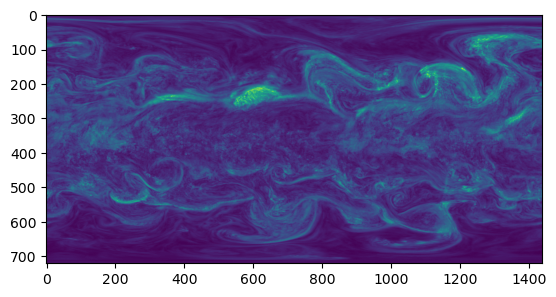

In [44]:
plt.imshow(ds['cat'])

In [47]:
"""gribfile.seek(0)

for grb in gribfile:
    print(grb)
    for key in grb.keys():
        print(key)
   
    """

3:37:37 (instant):regular_ll:isobaricInhPa:level 15000 Pa:fcst time 27 hrs:from 202401090000
4:37:37 (instant):regular_ll:isobaricInhPa:level 17500 Pa:fcst time 27 hrs:from 202401090000
5:37:37 (instant):regular_ll:isobaricInhPa:level 20000 Pa:fcst time 27 hrs:from 202401090000
6:37:37 (instant):regular_ll:isobaricInhPa:level 22500 Pa:fcst time 27 hrs:from 202401090000
7:37:37 (instant):regular_ll:isobaricInhPa:level 25000 Pa:fcst time 27 hrs:from 202401090000
8:37:37 (instant):regular_ll:isobaricInhPa:level 27500 Pa:fcst time 27 hrs:from 202401090000
9:37:37 (instant):regular_ll:isobaricInhPa:level 30000 Pa:fcst time 27 hrs:from 202401090000
10:37:37 (instant):regular_ll:isobaricInhPa:level 32500 Pa:fcst time 27 hrs:from 202401090000
11:37:37 (instant):regular_ll:isobaricInhPa:level 35000 Pa:fcst time 27 hrs:from 202401090000
12:37:37 (instant):regular_ll:isobaricInhPa:level 37500 Pa:fcst time 27 hrs:from 202401090000
13:37:37 (instant):regular_ll:isobaricInhPa:level 40000 Pa:fcst tim